# Pandas Fundamentals Lab



## About

This pandas lab is aimed to reinforce the fundamentals of pandas before we jump into handling of missing values, column operations, and summarizing info.  

The `tweets-dataset.csv` dataset can be found in the Session 5 `Datasets` folder.  We will use this dataset for the entire lab.  You can either upload the tweets-dataaset.csv to Collab (I have a quick video showing how it is done), or you can use the URL below.

`https://raw.githubusercontent.com/Btibert3/is834/master/datasets/tweets-dataset.csv`



> **Reminder:  Pandas can handle csv files from the web, or, compressed in .zip folders**

## Section 1 - Setup your environment

In [58]:
# load numpy and pandas into your python session
import numpy as np
import pandas as pd
%matplotlib inline

## Section 2 - Import the data

Hint:  You can select upload from the file menu to import the tweets.csv dataset from your laptop to Google Collab.  You just need to download it from the course site on QTools first or read in the dataset from the web, with the address shown above.

In [8]:
# the the dataset into a pandas dataframe and assign it the name tweets

tweets = pd.DataFrame(pd.read_csv("datasets/tweets-dataset.csv"))

## Section 3 - Exploratory Data Analysis (EDA)

### Number of rows and columns

In [12]:
# print out the number of rows and columns
## for each, the sentence should sya "the number of <insert metric here> in the tweets dataset is <insert value here>.
tweets.shape

(368, 14)

In [15]:
### View a random sample of 7 rows
tweets.sample(n=7, replace = False, random_state = 1)

,user_id,status_id,created_at,text,source,favorite_count,retweet_count,lang,followers_count,friends_count,statuses_count,account_lang,account_created_at,tags
301,1044589785866678272,1055433195020263424,2018-10-25T12:17:37Z,Please give your valuable feedbacks. #rstats #...,Twitter Web Client,2,3,en,48,210,21,en,2018-09-25T14:09:47Z,rstats|RLadies|r4ds
122,408580973,1055656674516762625,2018-10-26T03:05:39Z,"When you’re cruising along in model selection,...",Twitter for iPhone,3,1,en,645,495,9350,en,2011-11-09T16:23:09Z,phdlife|rstats
228,130791303,1055520298261463040,2018-10-25T18:03:44Z,How long until Berlin is ready for subway job ...,Twitter for Android,4,1,en,277,449,912,de,2010-04-08T09:43:49Z,rstats|scala|onlyinberlin
257,310855369,1055492802425970688,2018-10-25T16:14:28Z,There is a specific #immigration project that ...,Twitter for Android,0,1,en,329,1780,242,en,2011-06-04T13:31:09Z,immigration|data4democracy|Python|rstats
102,836526073340801024,1055689145794863114,2018-10-26T05:14:40Z,A pleasure to be the opponent of the licenciat...,Twitter Web Client,7,1,en,741,363,424,en,2017-02-28T10:38:52Z,rstats
147,1823987821,1055633126964125697,2018-10-26T01:32:04Z,Here we go! Live from Korea: https://t.co/wsOV...,Twitter for Android,75,4,en,1879,543,6194,en,2013-09-08T09:54:48Z,rstats
234,2661769334,1055515436580814854,2018-10-25T17:44:25Z,@ICBI_Georgetown Code and slides for our works...,Twitter Web Client,6,4,en,698,443,1908,en,2014-07-20T05:09:40Z,rstats|metabolomics|Duchenne


## Section 4 - Select Rows and Columns

### Column Selection

In [19]:
# create a new dataframe with the user_id, status_id, text, source, and favorite_count fields
# call this new dataframe tweets2
tweets2 = tweets[['user_id', 'status_id', 'text', 'source', 'favorite_count']]

In [20]:
# view the last 4 rows of the data
tweets2.tail(4)

,user_id,status_id,text,source,favorite_count
364,34091991,1055291425586364416,#rstats the #GASP event has been informative ...,Twitter for iPhone,1
365,194162292,1055287791507161088,@joelmcglothlin @ZarahPattison I also highly r...,Twitter Web Client,10
366,543981616,1055286410867920896,One of my favorite #rstats packages. https://t...,Twitter for iPhone,1
367,3230388598,1055280033294618624,"✂️ Got snippets? Keep 'em organized…\n📦 ""snipp...",Buffer,50


### Row Selection

In [36]:
# from tweets2, select the rows with 1 or more favorites and has more than 100 characters in the tweet
# save this in a dataframe called tweets_filtered
tweets_filtered = tweets2.loc[(tweets2['favorite_count']>0) & (len(tweets2['text']) > 100)]

In [37]:
# view the top 5 rows of the data
tweets_filtered.head(5)

,user_id,status_id,text,source,favorite_count
7,961691888939126784,1055400840335376384,World Cup 2018 \nTop 10 Players: Passing From ...,Twitter Web Client,29
9,287836809,1055595694998851590,Getting started Stamen maps with ggmap via #rb...,IFTTT,1
11,287836809,1055758001578106881,Popular Halloween Candy on US State Grid Map v...,IFTTT,1
18,18238982,1055464734387044352,"So, up to now, the submitted sessions for @SQL...",TweetDeck,2
21,1269383796,1055482697429274624,Drawing beautiful maps programmatically with R...,IFTTT,2


In [38]:
# print out how many rows of data you have using a sentence similar to above in Section 2
tweets_filtered.shape

(265, 5)

## Section 5 - Rows kept

In [45]:
## for the number of rows in tweets_filtered, express this as a percentage of the total number of rows in tweets, our original dataframe.
## do this using python code, not handcoded data
str = "{}%"
num = np.round(len(tweets_filtered)/len(tweets)*100)
print(str.format(num))

72.0%


## Section 6 - Summarize the dataframe

In [53]:
## using tweets filtered from Section 4, summarize the numerical fields in the dataset
tweets_filtered.describe()

,user_id,status_id,favorite_count
count,2.650000e+02,2.650000e+02,265.000000
mean,1.827190e+17,1.055533e+18,10.875472
std,3.688303e+17,1.261719e+14,22.430439
min,1.230600e+04,1.055280e+18,1.000000
25%,1.445930e+08,1.055433e+18,2.000000
50%,9.167344e+08,1.055520e+18,4.000000
75%,4.185694e+09,1.055627e+18,8.000000
max,1.044590e+18,1.055791e+18,189.000000


## Section 7 - Check for missing data

In [56]:
# for each column in tweets filtered, show a count of how many missing values exist
tweets_filtered.isnull().sum()

user_id           0
status_id         0
text              0
source            0
favorite_count    0
dtype: int64

## Section 8 - Quick Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ef7940>]],
      dtype=object)

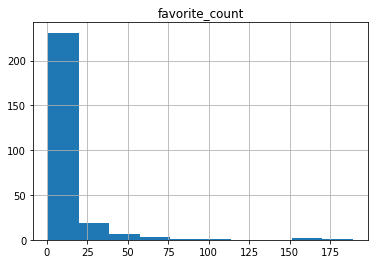

In [60]:
# generate a histogram for favorite_count from tweets_filtered using the built in plotting from pandas
tweets_filtered[['favorite_count']].hist()

## Section 9 - Advanced Filtering

In [74]:
## from the originally loaded dataset, tweets, select tweets with:
## - 75 or more favorites
## - 25 or more characters in the tweet
## - keep only the user_id, status_id, text, favorite_count columns
## save this in a new dataframe called tweets_final
tmp = tweets[(tweets['favorite_count'] >74) | (len(tweets['text'])>24)]
tweets_final = tmp[['user_id', 'status_id', 'text', 'favorite_count']]

In [82]:
# print out the last 4 rows of tweets_final using negative slicing
tweets_final[-4:]

,user_id,status_id,text,favorite_count
364,34091991,1055291425586364416,#rstats the #GASP event has been informative ...,1
365,194162292,1055287791507161088,@joelmcglothlin @ZarahPattison I also highly r...,10
366,543981616,1055286410867920896,One of my favorite #rstats packages. https://t...,1
367,3230388598,1055280033294618624,"✂️ Got snippets? Keep 'em organized…\n📦 ""snipp...",50


## Section 10 -  Bonus, advanced question

The question below has not yet been discussed formally, but from the emphasis on using .<tab> to look for methods, and the ability to look at the help for these methods, you might be able to figure it out.  
  
 Plus, remember, Google and Stack Overflow are your friend!

In [104]:
## Using the original dataset, tweets, what was the most frequest source and how many tweets were created via that source
tweets['source'].value_counts().head(1)

Twitter Web Client    148
Name: source, dtype: int64